### HAR 데이터 읽어 오기

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

feature_name_df = pd.read_csv(url, sep="\s+", header=None,
                             names=['column_index', 'column_name'])
feature_name_df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [7]:
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name[:10]


['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X']

In [25]:
X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_train = pd.read_csv('HAR_dataset/train/X_train.txt',sep='\s+', header=None)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [26]:
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'


X_test = pd.read_csv('HAR_dataset/test/X_test.txt', sep='\s+', header=None)

###  특성만 561개 이다.

In [28]:
X_train.columns = feature_name
X_test.columns = feature_name
X_train.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


### y 데이터 읽어오기

In [31]:
y_train_url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_train_url ='https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv('HAR_dataset/train/y_train.txt', sep='\s+', header=None, names=['action'])
y_test = pd.read_csv("HAR_dataset/test/y_test.txt", sep='\s+', header=None, names=['action'])

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7352, 561), (2947, 561), (7352, 1), (2947, 1))

### 각 액션별 데이터의 수

In [34]:
y_train['action'].value_counts()
    

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

### RandomForest를 하기전 결정나무를 먼저 해보자

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=13, max_depth=4)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

accuracy_score(y_test, pred)


0.8096369189005769

### max_depth를 다양하게 하고 GridSearchCV를 이용

In [37]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24]
}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy',
                      cv=5, return_train_score=True)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=13,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,

In [38]:
grid_cv.best_score_

0.8551414581066377

### max_depth 8 이 좋다고 나옴

In [39]:
grid_cv.best_params_

{'max_depth': 8}

### max_depth별로 표로 성능을 정리

In [40]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.843580,0.944848
1,8,0.855141,0.982693
2,10,0.847252,0.993369
3,12,0.841540,0.997212
4,16,0.841404,0.999660
5,20,0.841812,0.999966
6,24,0.841268,1.000000


### 실제 test 데이터에서의 결과

In [42]:
max_depths = [6,8,10,12,16,20,24]

for depth in max_depths:
    df_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    df_clf.fit(X_train, y_train)
    pred = df_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Max_depth = ' ,depth, "Accuracy", accuracy)

Max_depth =  6 Accuracy 0.8557855446216491
Max_depth =  8 Accuracy 0.8707159823549372
Max_depth =  10 Accuracy 0.8673227010519172
Max_depth =  12 Accuracy 0.8646080760095012
Max_depth =  16 Accuracy 0.8574821852731591
Max_depth =  20 Accuracy 0.8547675602307431
Max_depth =  24 Accuracy 0.8547675602307431


### 베스트 모델의 결과

In [43]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)

accuracy_score(y_test, pred1)

0.8734306073973532

### 랜덤포레스트를 적용

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

params = {
    'max_depth' : [6,8,10],
    'n_estimators' : [50, 100 ,200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=13,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

### 결과에는 이러한 내용들이 들어 있다

In [45]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_min_samples_leaf', 'param_min_samples_split',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')

### 성능이 결정나무보다 좋다

In [46]:
target_col = ['rank_test_score', 'mean_test_score', "param_n_estimators", 'param_max_depth']
cv_results_df[target_col].sort_values('rank_test_score').head()

,rank_test_score,mean_test_score,param_n_estimators,param_max_depth
28,1,0.913493,100,10
25,1,0.913493,100,10
29,3,0.910637,200,10
26,3,0.910637,200,10
16,3,0.910637,100,8


### best모델

In [48]:
grid_cv.best_params_

{'max_depth': 10,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [49]:
grid_cv.best_score_

0.9134929270946681

### test데이터에 적용

In [50]:
rf_clf_best = grid_cv.best_estimator_
rf_clf_best.fit(X_train, y_train)

pred1 = rf_clf_best.predict(X_test)

accuracy_score(y_test, pred1)


0.9205972175093315

### 중요 특성 확인

In [51]:
best_cols_values = rf_clf_best.feature_importances_
best_cols = pd.Series(best_cols_values, index=X_train.columns)
top20_cols = best_cols.sort_values(ascending=False)[:20]
top20_cols

angle(X,gravityMean)               0.034638
tGravityAcc-max()-Y                0.032518
tGravityAcc-energy()-X             0.031309
tGravityAcc-mean()-X               0.029513
tGravityAcc-min()-X                0.027775
tGravityAcc-max()-X                0.027662
angle(Y,gravityMean)               0.026553
tGravityAcc-mean()-Y               0.026052
tGravityAcc-min()-Y                0.023037
tGravityAcc-energy()-Y             0.018678
tGravityAcc-mean()-Z               0.015688
angle(Z,gravityMean)               0.012837
fBodyAcc-mad()-X                   0.012558
tBodyAcc-max()-X                   0.011970
fBodyAccJerk-bandsEnergy()-1,24    0.011803
tBodyAccJerk-entropy()-X           0.011647
tGravityAccMag-std()               0.011451
tBodyAccJerk-energy()-X            0.011333
tGravityAcc-arCoeff()-Z,1          0.011257
fBodyAccJerk-max()-X               0.011040
dtype: float64

### 주요 특성 관찰

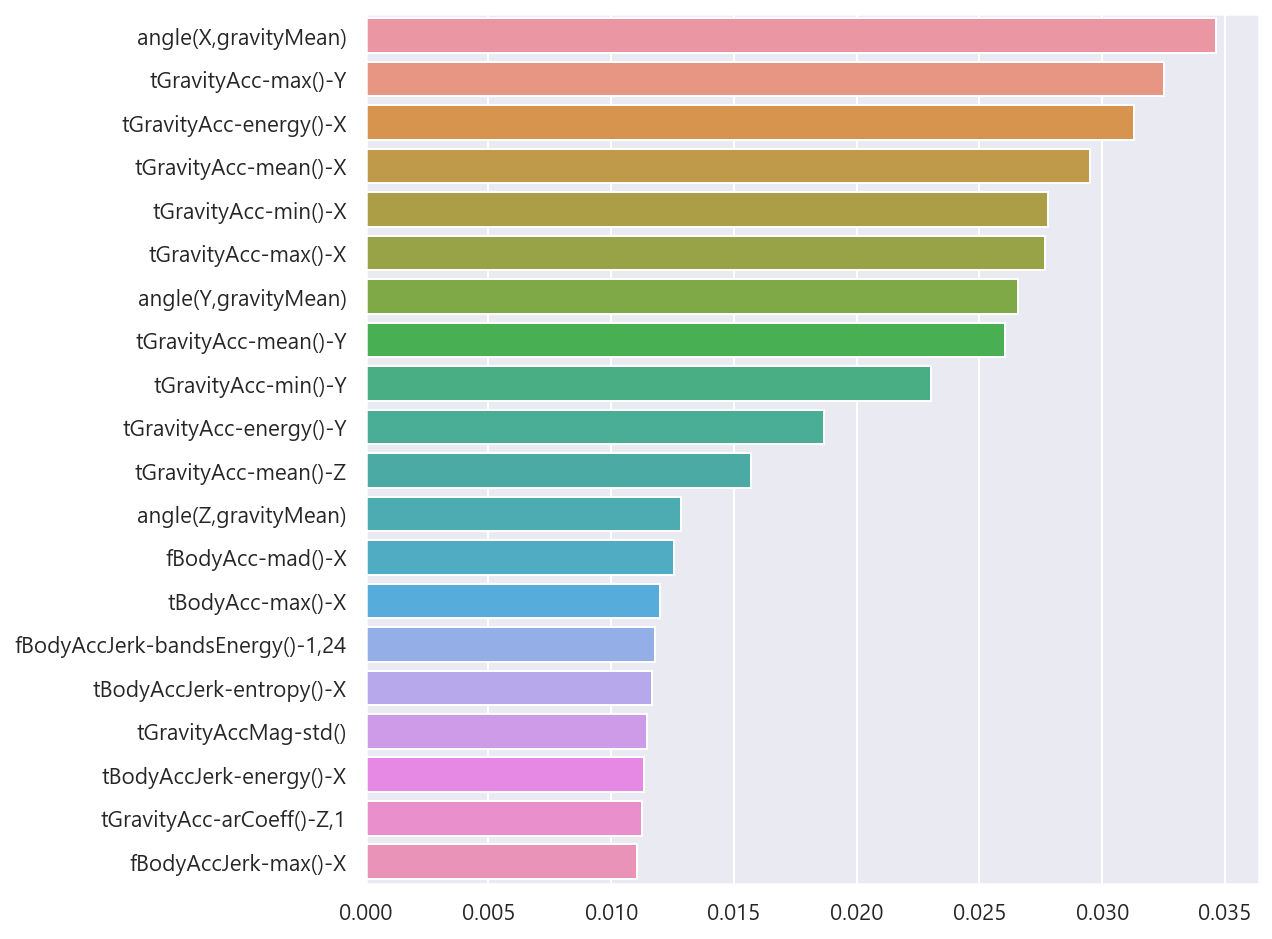

In [52]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.barplot(x=top20_cols, y=top20_cols.index)
plt.show()

### 20개의 특성만 가지고 다시 성능 확인
   - 561개의 특성보다 20개의 특성만 보면 연산속도가 정말 빠를것이다. 비록 acc를 포기하더라도

In [53]:
X_train_re = X_train[top20_cols.index]
X_test_re = X_test[top20_cols.index]

In [54]:
rf_clf_best_re = grid_cv.best_estimator_
rf_clf_best_re.fit(X_train_re, y_train.values.reshape(-1,))

pred1_re = rf_clf_best_re.predict(X_test_re)

accuracy_score(y_test, pred1_re)

0.8177807940278249